## <span style="color:blue">開啟影像檔與顯示影像</span>
下面示範用openCV的cv2.imread讀入影像與用cv2.imshow開啟視窗來顯示影像。<span style="color:red">使用cv2.imshow必須呼叫cv2.waitKey來處理視窗事件，否則不會顯示視窗。</span>

In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

url='https://tronclass.ntou.edu.tw:443/api/uploads/3206911/in-rich-content?created_at=2022-02-13T07:24:53Z'
src_file=tf.keras.utils.get_file('highway',origin=url)
img = cv2.imread(src_file)
# if cv2.imread cannot find the image file, it returns None
if img is not None:
    # show this image by cv2.imshow
    cv2.imshow('image',img)    
    
    # call cv2.waitKey to process window messages
    cv2.waitKey()
    
    # destroy all windows
    cv2.destroyAllWindows()
else:
    print('image file is not found')

有時候，影像崁入notebook裡會更方便，這時就可以用matplotlib裡的plt.imshow。<span style="color:red">不過要注意，matplotlib的影像channel順序為RGB，但是openCV順序為BGR</span>。

196608/181603 [================================] - 0s 0us/step


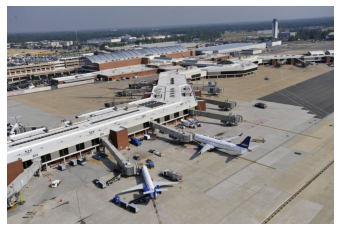

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

url='https://tronclass.ntou.edu.tw:443/api/uploads/3206875/in-rich-content?created_at=2022-02-13T07:24:49Z'
src_file=tf.keras.utils.get_file('airport',origin=url)
img = cv2.imread(src_file)
if img is not None:
    # show this image by plt.imshow
    # In plt.imshow, the order of the three channels is R, G, and B. 
    # In opencv, the order of the three channels is B, G, and R.
    plt.imshow(img[:,:,[2,1,0]])
    plt.axis('off')
else:
    print('image file is not found')

若要一並呈現好多張影像。可以使用subplot(row,column,figure_id)指令，表示共有row列,column行的sugplot裡第figure_index個subplot。

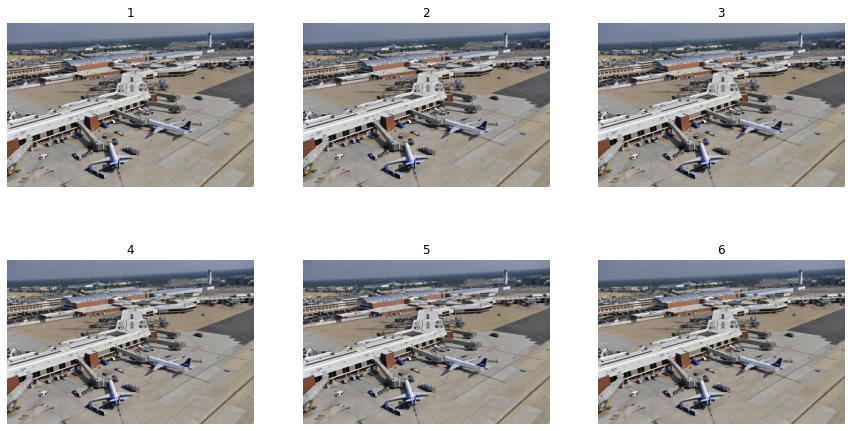

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

url='https://tronclass.ntou.edu.tw:443/api/uploads/3206875/in-rich-content?created_at=2022-02-13T07:24:49Z'
src_file=tf.keras.utils.get_file('airport',origin=url)
img = cv2.imread(src_file)
plt.figure(figsize=(15,8))
if img is not None:    
    for i in range(1,7):
        plt.subplot(2,3,i)
        plt.imshow(img[:,:,[2,1,0]])
        plt.title(str(i))
        plt.axis('off')
    plt.show()
else:
    print('image file is not found')

## <span style="color:blue">儲存影像</span>
下面程式會將一張影像轉45,90,135,180,224,270,315度之後用cv2.imwrite儲存結果。

In [8]:
import cv2
import numpy as np
import math
import tensorflow as tf

url='https://tronclass.ntou.edu.tw:443/api/uploads/3206911/in-rich-content?created_at=2022-02-13T07:24:53Z'
src_file=tf.keras.utils.get_file('highway',origin=url)

img = cv2.imread(src_file)

ext_name = '.jpg'

cy,cx= np.array(img.shape[0:2])//2

rotation = np.zeros((2,3))

org_corners = np.array([[0,0,1],[img.shape[1],0,1],[img.shape[1],img.shape[0],1],[0,img.shape[0],1]]).reshape(-1,3).T

for i in range(0,360,45):
    # setup a rotation matrix
    rotation[0,0] =  math.cos(i/180*math.pi)
    rotation[0,1] = -math.sin(i/180*math.pi)
    rotation[1,1] = rotation[0,0]
    rotation[1,0] = -rotation[0,1]
    
    # determine the size of the rotated image
    cpos = rotation.dot(org_corners)
    size = np.asarray(np.max(cpos,axis=1)-np.min(cpos,axis=1),dtype=int)
    
    # setup the affine transformation matrix
    rotation[:,2] = rotation[0:2,0:2].dot(np.array([-cx,-cy]).reshape(2,-1)).ravel()+size//2
    
    # generate the transformed image
    dst = cv2.warpAffine(img,rotation,tuple(size)) 
    
    cv2.imwrite('./rotation-'+str(i)+ext_name,dst)
    
    cv2.imshow('rotation-'+str(i),dst)
    cv2.waitKey(5000)
    cv2.destroyWindow('rotation-'+str(i))
    
cv2.destroyAllWindows()

### <span style="color:blue;background-color:#ffd0d0">練習</span>
<div style="background-color:#ffd0d0">
將上面例子修改成用plt.imshow取代cv2.imshow+cv2.waitKey+cv2destroyWindow+cv2.destroyAllWindows，以2列4行方式顯示在notebook裡。
</div>

## <span style="color:blue">開啟視訊檔</span>
cv2.VideoCapture用來開啟視訊檔。下面例子開啟視訊檔，並且建立一個滑桿(trackbar)，讓使用者可以移動到任意畫面。

<font color="red">執行下面範例前，請先下載768x576.avi到此份講義所在目錄下。</font>


In [1]:
import cv2

cap    = cv2.VideoCapture('./768x576.avi')
print('height:{} width:{}'.format(int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))))
frame_num = 0
total_frame=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

def set_frame_number(x):
    global frame_num
    frame_num = x
    return

cv2.namedWindow('video file')
cv2.createTrackbar('frame no.','video file',0,total_frame-1,set_frame_number)

while frame_num < total_frame:
    cv2.setTrackbarPos('frame no.','video file',frame_num)
    cap.set(cv2.CAP_PROP_POS_FRAMES,frame_num)
    ret, frame = cap.read() 
    if ret==False:
        break
    cv2.imshow('video file',frame)
    key = cv2.waitKey(20) & 0xFF
    if key == 27:
        break
    frame_num += 1
    
cap.release()
cv2.destroyAllWindows()

height:0 width:0


OpenCV: Couldn't read video stream from file "./768x576.avi"


## <span style="color:blue">建立視訊檔</span>
cv2.VideoWriter用來建立視訊檔。下面範例會開啟一個視訊檔，輸入每個畫面，並在畫面中央會畫上一個紅色正方形後將結果輸出至另一個視訊檔。

In [6]:
import cv2

cap = cv2.VideoCapture('./768x576.avi')
out = cv2.VideoWriter('./samplevideo.avi',cv2.VideoWriter_fourcc(*'XVID'), 20.0, 
                            (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while True:
    ret, frame = cap.read()
    
    if ret == False:
        break
        
    cv2.rectangle(frame,(frame.shape[1]//2-50,frame.shape[0]//2-50),(frame.shape[1]//2+50,frame.shape[0]//2+50),(0,0,255))
    
    out.write(frame)
    cv2.imshow('capture',frame)
    
    key = cv2.waitKey(20) & 0xFF
    
    if key == 27:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

## <span style="color:blue">啟動視訊相機</span>
cv2.VideoCapture(0)可以啟動視訊相機。視訊物件有很多屬性可以設定與查閱(如、cv2.CAP_PROP_FRAME_HEIGHT、cv2.CAP_PROP_FRAME_WIDTH、cv2.CAP_PROP_FRAME_COUNT、cv2.CAP_PROP_POS_FRAMES)，詳細內容參考cv2.VideoCapture說明。

In [7]:
import cv2

cap    = cv2.VideoCapture(0)
print('height:{} width:{}'.format(int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))))

while True:
    ret, frame = cap.read() 
    if ret==False:
        break
    cv2.imshow('camera',frame)
    key = cv2.waitKey(20) & 0xFF
    if key == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

height:480 width:640
